In [1]:
import mne
import glob
import xlrd
import numpy as np
import pandas as pd
import scipy.signal
import scipy.io as scio

from past.builtins import unicode
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#读取SE训练数据
train_data_file_path=sorted(glob.glob(r"../SE_train_processed/"+"*"))
print("训练集大小：",len(train_data_file_path))

#读取SE测试数据
test_data_file_path=sorted(glob.glob(r"../SE_test_processed/"+"*"))
print("测试集大小：",len(test_data_file_path))

训练集大小： 2060
测试集大小： 47


In [3]:
# 获取刺激参数
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)

In [4]:
# 构建训练和标签
y_train= df_train['result'].to_list()
print("训练集正样本比例：",sum(y_train)/len(y_train))

y_test = df_test['result'].to_list()
print("测试集正样本比例：",sum(y_test)/len(y_test))

训练集正样本比例： 0.4975728155339806
测试集正样本比例： 0.8936170212765957


In [5]:
# for i in range(len(y_train)):
#     if y_train[i]==0:
#         y_train[i]=-1
# for i in range(len(y_test)):
#     if y_test[i]==0:
#         y_test[i]=-1

In [6]:
raw = mne.io.read_raw_fif(train_data_file_path[0])
channel_num= len(raw.ch_names) # 选择的通道数
train_SE_len = 16 # 训练集的SE切片长度
test_SE_len = 16 # 测试集的SE切片长度
## 切成2s一段,标签拉长
y_train=[i for i in y_train for j in range(train_SE_len//2)]
y_test=[i for i in y_test for j in range(test_SE_len//2)]
print('训练集标签长度:',len(y_train))
print('测试集标签长度:',len(y_test))

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
训练集标签长度: 16480
测试集标签长度: 376


In [7]:
# 训练集数据读取
samps = 2
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   
x_train=np.array(x_train)
x_train.shape

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_16.fif...
Isotrak not found
    Range : 0 ..

Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.

Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220615(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220615(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220511(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220511(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220511(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220511(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_35.fif...
Isotrak not found
    Range : 0 ..

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_36.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_37.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_38.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_39.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_40.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095

Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220914(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_36.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_37.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_38.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_39.fif...
Isotrak not found
    Range : 0 ... 4095

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220615(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220413(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220413(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220413(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220413(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220420(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220420(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_35.fif...
Isotrak not found
    Range : 0 ..

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220708(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.99

Opening raw data file ../SE_train_processed\AV-王文珊-20200328(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(sc

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095

Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_26.fif...
Isotrak not found
    Range : 0 ..

Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train

Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-202205

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220831(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220831(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220831(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220831(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ..

Opening raw data file ../SE_train_processed\AV-胡杨-20220824(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

Opening raw data file ../SE_train_processed\AV-董沁鑫-20220725(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220725(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220617(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220617(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220617(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220617(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220617(scale

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220718(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220718(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220718(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220718(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220720(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-谢思沂-20220720(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Op

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220422(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220425(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220425(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220425(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220425(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-陈倩-20220425(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(16480, 15, 512)

In [8]:
# 测试集数据读入
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)
x_test=np.array(x_test)
print(x_test.shape)

# 测试和训练同理
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
y_test=np.array(y_test)
print(x_test.shape,y_test.shape)

Opening raw data file ../SE_test_processed\AV-习俊豪-20220525.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-习俊豪-20220530.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-习俊豪-20220606.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220715.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220718.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220720.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220722.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ... 

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import initializers

In [10]:
# 复现2021年利用LSTM预测ECT session反应的实验
input1=tf.keras.layers.Input(shape=(512,1))#单通道2s数据
conv1 = Conv1D(32,3,padding='same',activation='selu',kernel_initializer='lecun_normal')(input1)
# 如果return_sequences=True：返回形如（samples，timesteps，output_dim）的3D张量否则，返回形如（samples，output_dim）的2D张量
# guide:https://blog.csdn.net/jiangpeng59/article/details/77646186
lstm1 = LSTM(512,return_sequences=True,kernel_initializer='lecun_normal')(conv1)
lstm2 = LSTM(256,kernel_initializer='lecun_normal')(lstm1)
dense = Dense(10,activation="selu",kernel_initializer='lecun_normal')(lstm2)
# output = Dense(1,activation='tanh')(dense)
output = Dense(1,activation='sigmoid',kernel_initializer='lecun_normal')(dense)

model = tf.keras.models.Model(inputs=input1,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 512, 32)           128       
                                                                 
 lstm (LSTM)                 (None, 512, 512)          1116160   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,906,325
Trainable params: 1,906,325
Non-train

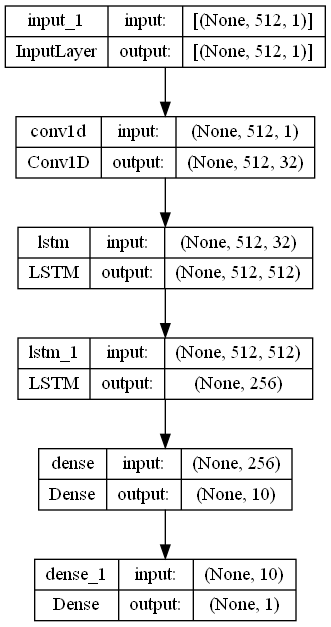

In [11]:
tf.keras.utils.plot_model(model, to_file="../img/1-CNN_LSTM.png",show_shapes=True)

In [12]:
adam = tf.keras.optimizers.Adam(lr=10e-5)
model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
                       #,'Precision','Recall']
             )

In [13]:
x_train=np.array(x_train)# 处理输入
x_long_train = x_train.reshape(-1,512,1)# 整理成神经网络需要的输入格式
y_long_train = []
for i in y_train:
    for j in range(channel_num):
        y_long_train.append(i)
y_long_train=np.array(y_long_train,dtype = np.float32)
print(x_long_train.shape,y_long_train.shape)

(247200, 512, 1) (247200,)


In [14]:
x_long_test=x_test.reshape(-1,512,1)
y_long_test = []
for i in y_test:
    for j in range(channel_num):
        y_long_test.append(i)
y_long_test=np.array(y_long_test,dtype = np.float32)
print(x_long_test.shape,y_long_test.shape)

(5640, 512, 1) (5640,)


In [80]:
# 21年LSTM
my_epochs=1
my_batch_size=128
my_validation_split=0.2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

history = model.fit(x_long_train,y_long_train,
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1
#                     validation_split = my_validation_split,
                   )

1932/1932 [==============================] - 152s 79ms/step - loss: 0.0122 - accuracy: 0.9962


模型测试

In [15]:
# model = tf.keras.models.load_model('../model_save/1_CNN_LSTM_5_128_0.8404.h5')

In [16]:
# 查看测试集上的效果
test_result = model.evaluate(x_long_test,y_long_test)

177/177 [==============================] - 7s 21ms/step - loss: 1.2409 - accuracy: 0.8404


In [17]:
# 看一下输出的数值
pre_value=model.predict(x_long_test)
pre_value

177/177 [==============================] - 4s 20ms/step


array([[0.9998851 ],
       [0.99990666],
       [0.99914193],
       ...,
       [0.99919945],
       [0.99999666],
       [0.99999964]], dtype=float32)

In [18]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
y_pre = []
for i in pre_value:
    if i > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

# 计算各个指标
accuracy = accuracy_score(y_long_test,y_pre)
precision = precision_score(y_long_test,y_pre)
recall = recall_score(y_long_test,y_pre)
F1_socre = f1_score(y_long_test,y_pre)
print(F1_socre,precision,recall,accuracy)

# 计算混淆矩阵
'''
标签\预测    0       1 
    0    0预测为0 0预测为1
    1    1预测为0 1预测为1
'''
confusion_matrix(y_long_test,y_pre)

0.9128244866330879 0.8917486752460257 0.9349206349206349 0.8404255319148937


array([[  28,  572],
       [ 328, 4712]], dtype=int64)

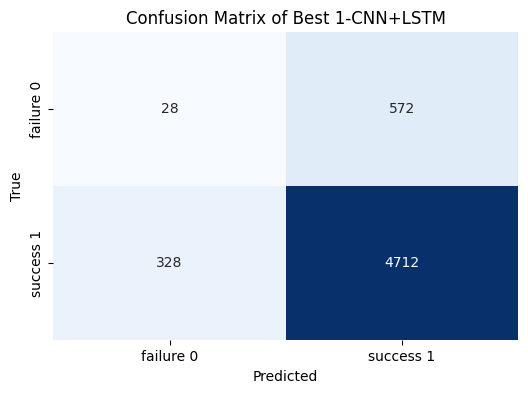

In [20]:
cm=confusion_matrix(y_long_test,y_pre)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['failure 0', 'success 1'], yticklabels=['failure 0', 'success 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Best 1-CNN+LSTM")
plt.savefig("../img/best_1-CNN+LSTM_conf"+".jpg")
# plt.savefig("../img/1_CNN_LSTMconf_"+'6'+'_'+str(my_batch_size)+'_'+str(test_result[1])[:6]+".jpg")
plt.show()

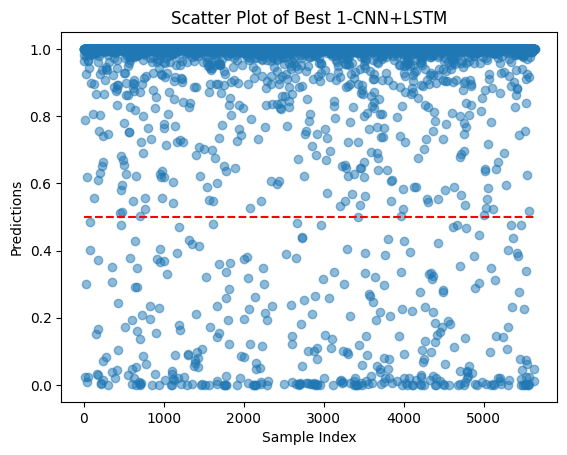

In [21]:
# 假设以下数据为模型预测输出和真实标签

# 绘制散点图
plt.scatter(range(len(pre_value)), pre_value, alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Predictions")

# 为了更好地展示数据分布，可以添加一个对角线
plt.plot([-1,len(pre_value)], [0.5, 0.5], linestyle="--", color="red")
plt.title("Scatter Plot of Best 1-CNN+LSTM")
plt.savefig("../img/best_1-CNN+LSTM_pred"+".jpg")
# plt.savefig("../img/1_CNN_LSTMpred_"+'6'+'_'+str(my_batch_size)+'_'+str(test_result[1])[:6]+".jpg")

plt.show()

177/177 [==============================] - 4s 20ms/step


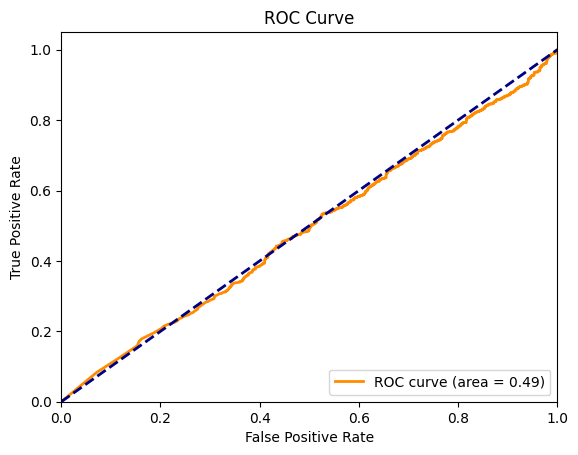

In [96]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('../model_save/1_CNN_LSTM_5_128_0.8404.h5')
pre_value=model.predict(x_long_test)
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_long_test, pre_value)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

绘图和保存模型

In [25]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

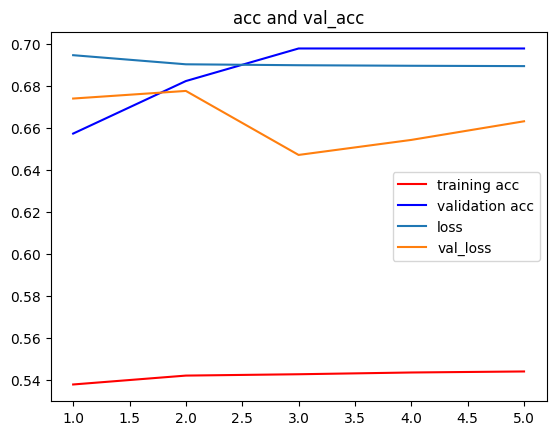

In [28]:
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.legend()#显示左上角的图例
plt.savefig("./Image/21复现/acc_loss.jpg")
plt.show()

In [86]:
model.save('../model_save/1_CNN_LSTM_'+ '6'+'_'+str(my_batch_size)+'_'+str(test_result[1])[:6]+".h5")

In [94]:
model = tf.keras.models.load_model('../model_save/1_CNN_LSTM_4_64_0.8326.h5')